In [4]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:

wind_data = pd.read_csv("20020101.csv")
wind_data

,DATE (MM/DD/YYYY),MST,Direct Normal [W/m^2],Avg Wind Speed @ 2m [m/s],Avg Wind Speed @ 5m [m/s],Avg Wind Speed @ 10m [m/s],Avg Wind Speed @ 20m [m/s],Avg Wind Speed @ 50m [m/s],Avg Wind Speed @ 80m [m/s]
0,1/1/2002,00:00,-99999,2.0394,2.3580,2.7312,2.8151,4.1876,4.1892
1,1/1/2002,00:01,-99999,2.3720,2.6570,2.7907,2.8560,4.0661,4.3228
2,1/1/2002,00:02,-99999,2.8346,3.3486,3.5522,2.9207,4.2418,4.1098
3,1/1/2002,00:03,-99999,2.6098,2.9824,3.4231,2.8354,3.5784,3.6317
4,1/1/2002,00:04,-99999,2.9823,3.2205,3.5745,2.8801,3.7960,3.8350
...,...,...,...,...,...,...,...,...,...
1052643,1/1/2004,23:55,-99999,6.7405,7.3987,8.4406,9.5715,12.2470,14.0570
1052644,1/1/2004,23:56,-99999,6.8055,7.7346,8.9352,10.1530,13.1210,13.8840
1052645,1/1/2004,23:57,-99999,6.8835,7.4482,8.3858,9.3538,13.3980,14.1230
1052646,1/1/2004,23:58,-99999,5.6988,6.4714,7.1573,8.2743,11.6680,13.0020


In [6]:
raw_np_data = wind_data.to_numpy()
raw_np_data

array([['1/1/2002', '00:00', -99999, ..., 2.8151, 4.1876, 4.1892],
       ['1/1/2002', '00:01', -99999, ..., 2.856, 4.0661, 4.3228],
       ['1/1/2002', '00:02', -99999, ..., 2.9207, 4.2418, 4.1098],
       ...,
       ['1/1/2004', '23:57', -99999, ..., 9.3538, 13.398, 14.123],
       ['1/1/2004', '23:58', -99999, ..., 8.2743, 11.668, 13.002],
       ['1/1/2004', '23:59', -99999, ..., 10.658, 13.668, 15.266]],
      dtype=object)

In [7]:
raw_np_data.shape

(1052648, 9)

In [9]:
adjusted_data = np.zeros([raw_np_data.shape[0], raw_np_data.shape[1] + 2])
for r in range(raw_np_data.shape[0]):
    mdy = raw_np_data[r, 0].split("/")
    adjusted_data[r, 0:3] = mdy
    hm = raw_np_data[r, 1].split(":")
    adjusted_data[r, 3] = int(hm[0]) * 60 + int(hm[1])
    adjusted_data[r, 4:] = raw_np_data[r, 2:]

adjusted_data

array([[1.0000e+00, 1.0000e+00, 2.0020e+03, ..., 2.8151e+00, 4.1876e+00,
        4.1892e+00],
       [1.0000e+00, 1.0000e+00, 2.0020e+03, ..., 2.8560e+00, 4.0661e+00,
        4.3228e+00],
       [1.0000e+00, 1.0000e+00, 2.0020e+03, ..., 2.9207e+00, 4.2418e+00,
        4.1098e+00],
       ...,
       [1.0000e+00, 1.0000e+00, 2.0040e+03, ..., 9.3538e+00, 1.3398e+01,
        1.4123e+01],
       [1.0000e+00, 1.0000e+00, 2.0040e+03, ..., 8.2743e+00, 1.1668e+01,
        1.3002e+01],
       [1.0000e+00, 1.0000e+00, 2.0040e+03, ..., 1.0658e+01, 1.3668e+01,
        1.5266e+01]])

In [32]:
def slice_by_minute(data: np.ndarray, column: int):
    minute_data = [[] for x in range(24 * 60)]
    for r in range(data.shape[0]):
        minute = int(data[r, 3])
        ws = data[r, 5]
        if ws >= 0:
            minute_data[minute].append(data[r, column])

    mean_values = np.zeros([24 * 60])
    for r in range(len(minute_data)):
        mean_values[r] = np.mean(minute_data[r])

    return mean_values



In [33]:
# def filter_by_month(data: np.ndarray):

y  = np.linspace(0, 9, 10)
print(y)
indices = y[:] % 2 == 0
print("indices are", indices)

z = y[indices]

z

indices = adjusted_data[:, 0] == 3
print (indices)
march_data = adjusted_data[indices]

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
indices are [ True False  True False  True False  True False  True False]
[False False False ... False False False]


In [34]:

wind_meter_columns = [5, 6, 7, 8, 9, 10]
x = np.linspace(0, 1440, 1440)

def plot_data(data: np.ndarray):
    wind_data = []
    for c in wind_meter_columns:
        wind_data.append(slice_by_minute(data, c))

    fig = plt.figure()
    ax = plt.axes()
    for d in wind_data:
        ax.plot(x, d)

In [35]:

def slice_by_month(data: np.ndarray, month: int):
    indices = data[:, 0] == month
    return data[indices]


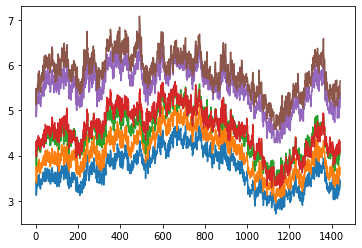

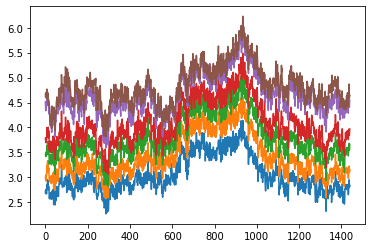

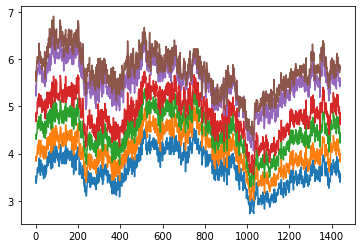

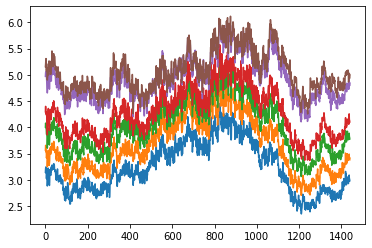

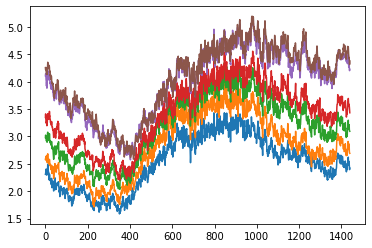

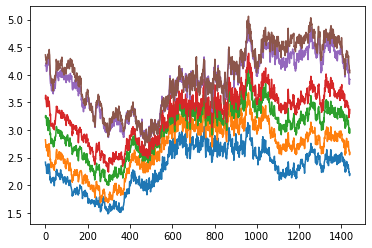

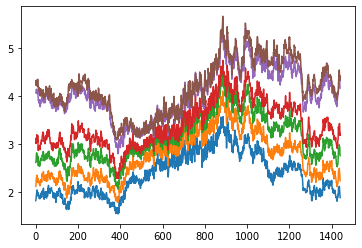

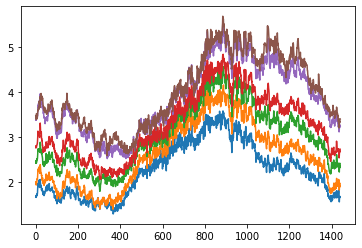

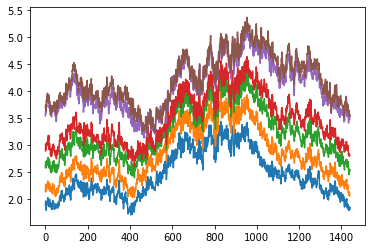

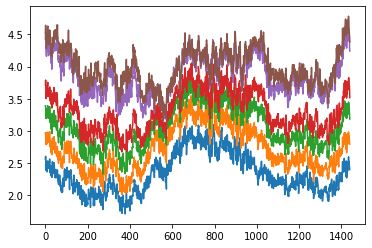

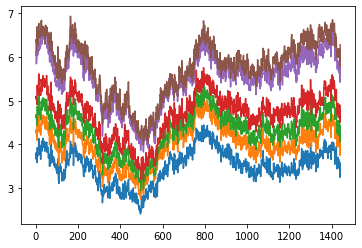

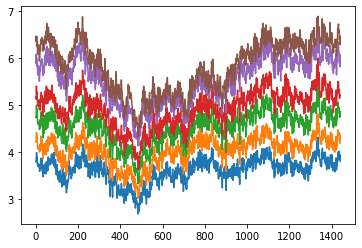

In [37]:
for i in range(1,13):
    d = slice_by_month(adjusted_data, i)
    plot_data(d)

